---
# 2. ADVANCED CIRCUITS

## Question 2.1

**How do you merge the lhs and rhs circuits to form the final circuit?**

<div align= "left">
    <p style="float: left;"><b> lhs:  </b></p> 
    <p><img src="..\images\advanced_circuits_images\lhs.png" style="float: left;" width = "210"/> </p> 
    <p style="float: left;"><b> rhs:  </b></p> 
    <p><img src="..\images\advanced_circuits_images\rhs.png" style="float: left;" width = "160"/> </p>
    <p style="float: left;"><b> final:  </b></p> 
    <p><img src="..\images\advanced_circuits_images\merged.png" style="float: left;" width = "300"/> </p>
</div>

**1)** `lhs.append(rhs)`

**2)** `lhs.combine(rhs)`

**3)** `lhs.compose(rhs)`

**4)**  `lhs+rhs`

**5)**  None of the above

In [1]:
from qiskit import QuantumCircuit

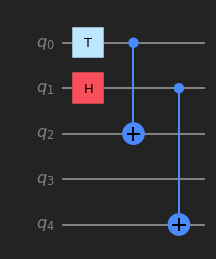

In [2]:
qc_lhs = QuantumCircuit(5)
qc_lhs.t(0)
qc_lhs.h(1)
qc_lhs.cx(0,2)
qc_lhs.cx(1,4)
qc_lhs.draw()

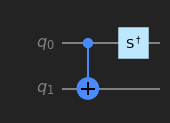

In [3]:
qc_rhs = QuantumCircuit(2)
qc_rhs.cx(0,1)
qc_rhs.sdg(0)
qc_rhs.draw()

In [4]:
# This syntax doesn't work so it will throw an error. Need to specify qubits. See next cell.
qc_final = qc_lhs.append(qc_rhs)

CircuitError: 'The amount of qubit arguments 0 does not match the instruction expectation (2).'

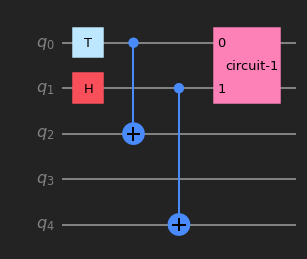

In [5]:
# The .append() method "appends" a new circuit as an instruction 
# to an existing circuit to in the specified qubits
qc_final = qc_lhs.copy()
qc_final.append(qc_rhs,[0,1])
qc_final.draw()

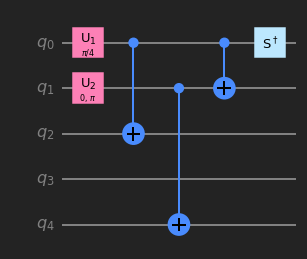

In [6]:
qc_final.decompose().draw()

In [7]:
# .combine() has been deprecated. Furthermore, # of qubits between the 2 circuits must match,
# so this code will show a warning and throw an error.
qc_final = qc_lhs.combine(qc_rhs)

/var/folders/f7/n0rc7kws02nb89k_cyf2mylr0000gn/T/ipykernel_1768/4206070422.py:3: DeprecationWarning: The QuantumCircuit.combine() method is being deprecated. Use the compose() method which is more flexible w.r.t circuit register compatibility.
  qc_final = qc_lhs.combine(qc_rhs)


CircuitError: "circuits are not compatible: registers QuantumRegister(5, 'q') and QuantumRegister(2, 'q') not compatible"

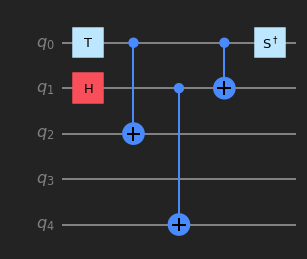

In [8]:
qc_final = qc_lhs.compose(qc_rhs)
qc_final.draw()

---
## Question 2.2

**What's the depth of `QuantumVolume(num_qubits=5, depth=5)` circuit after decomposition into basis gates `[u3,cx]`?**

**1)** 5

**2)** 10

**3)** 25

**4)** 35

**5)** None of the above

In [9]:
from qiskit.circuit.library import QuantumVolume

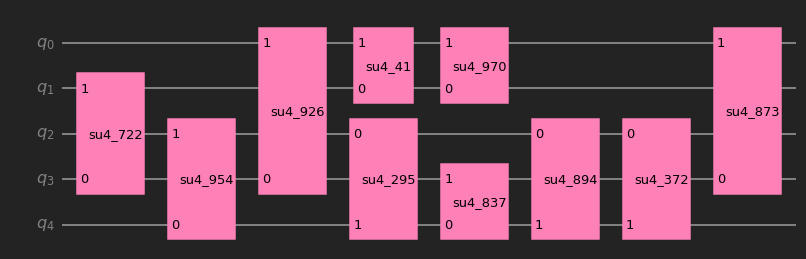

In [10]:
qc_qv = QuantumVolume(num_qubits=5, depth=5)
#qc_qv = QuantumVolume(num_qubits=6, depth=6, classical_permutation=False)
qc_qv = qc_qv.decompose()
qc_qv.draw(fold=-1)

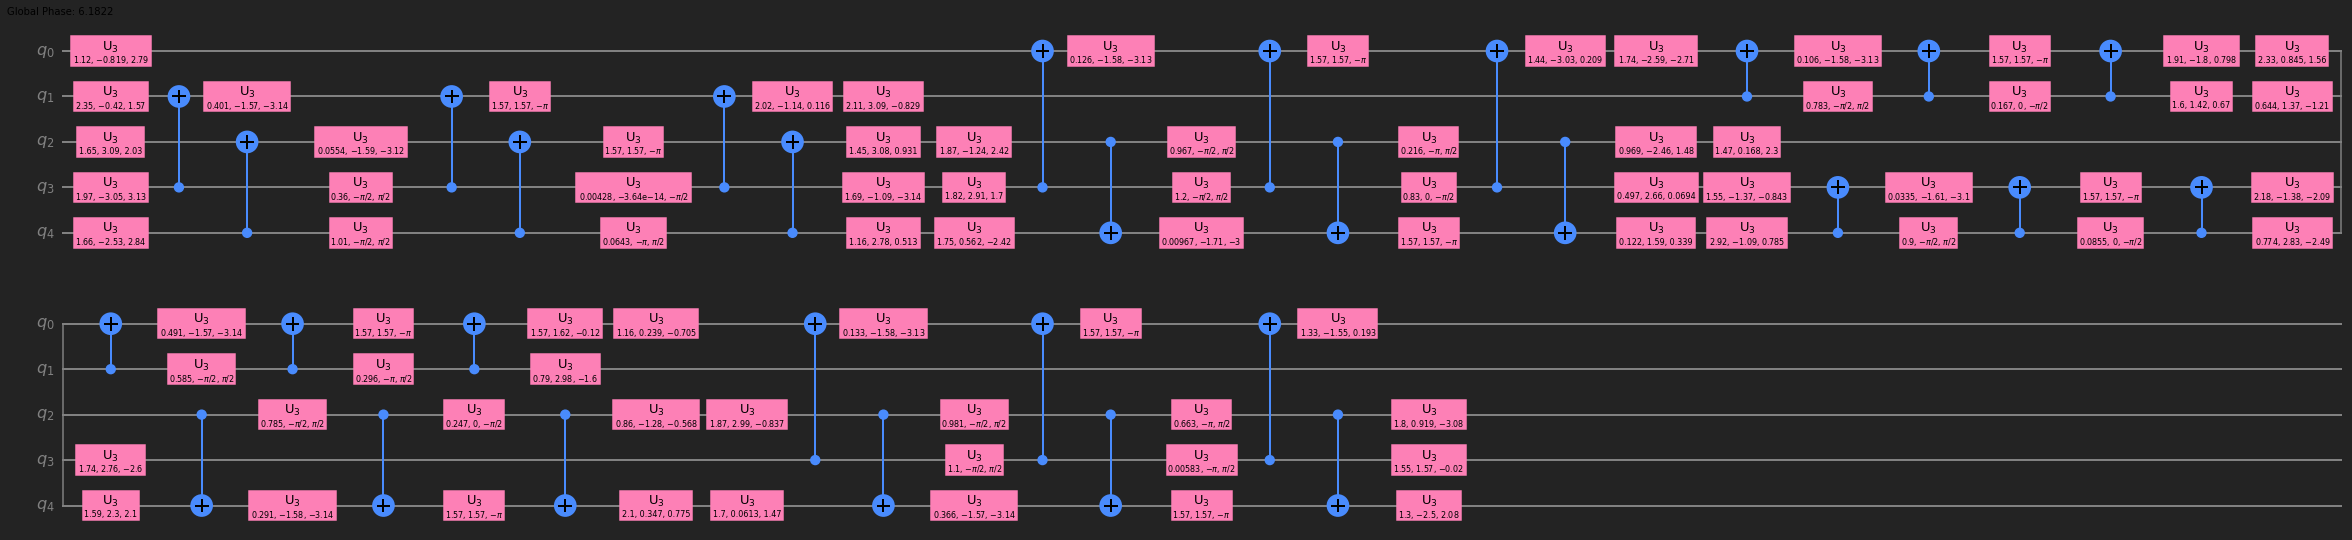

In [11]:
qc_qv = qc_qv.decompose()
qc_qv.draw(fold = 50)

In [12]:
qc_qv.depth()

35

---
## Question 2.3

**Which of the following gates/circuits are not currently available in the Qiskit circuit library?**

**1)** `HGate`

**2)** `NAND`

**3)** `QFT`

**4)** `QuantumVolume`

**5)** None of the above

In [13]:
# Import all options and see which one throws an error.
from qiskit.circuit.library import HGate, NAND, QFT, QuantumVolume

ImportError: cannot import name 'NAND' from 'qiskit.circuit.library' (/Users/diemilio/opt/anaconda3/lib/python3.8/site-packages/qiskit/circuit/library/__init__.py)

---
## Question 2.4

**Which one of the following Operators is different from the rest?**

**1)** `Operator(Pauli(label='XZ'))`

**2)** `Operator(Pauli(label='X')).tensor(Operator(Pauli(label='Z')))`

**3)**  `qc = QuantumCircuit(2)
  qc.x(0)
  qc.z(1)
  Operator(qc)`

**4)**  `Operator([[0, 0, 1, 0], [0, 0, 0, -1], [1, 0, 0, 0], [0, -1, 0, 0]])`

**5)** None of the above

In [14]:
from qiskit.quantum_info import Pauli, Operator
from qiskit.tools.visualization import array_to_latex

In [15]:
OP1 = Operator(Pauli(label='XZ'))
array_to_latex(OP1)

<IPython.core.display.Latex object>

In [16]:
OP2 = Operator(Pauli(label='X')).tensor(Operator(Pauli(label='Z')))
array_to_latex(OP2)

<IPython.core.display.Latex object>

In [17]:
qc = QuantumCircuit(2)
qc.x(0)
qc.z(1)
OP3 = Operator(qc)
array_to_latex(OP3)

<IPython.core.display.Latex object>

In [18]:
OP4 = Operator([[0, 0, 1, 0], 
                [0, 0, 0, -1], 
                [1, 0, 0, 0], 
                [0, -1, 0, 0]])
array_to_latex(OP4)

<IPython.core.display.Latex object>

## Question 2.5

**How many gates are in the quantum circuit that results from transpiling the following quantum circuit using only the pass LookaheadSwap? Assume the following coupling map: [[0, 1], [1, 2], [2, 3], [3, 4]]**

<img src="..\images\advanced_circuits_images\tpl_circuit.png" style="float: left;"/> </p> 

**1)** 6

**2)** 8

**3)** 9

**4)** 12

**5)** None of the above

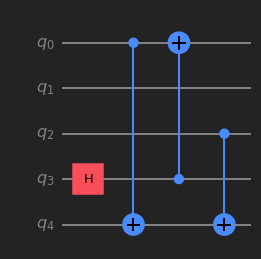

In [19]:
qc = QuantumCircuit(5)
qc.h(3)
qc.cx(0,4)
qc.cx(3,0)
qc.cx(2,4)
qc.draw()

In [20]:
from qiskit.transpiler import CouplingMap, PassManager
from qiskit.transpiler.passes import LookaheadSwap

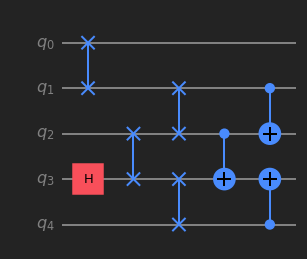

In [21]:
cmap = CouplingMap(couplinglist = [[0, 1], [1, 2], [2, 3], [3, 4]])
ls = LookaheadSwap(coupling_map = cmap)
pass_manager = PassManager(ls)
qc2 = pass_manager.run(qc)
qc2.draw()

In [23]:
qc2.size()

8